In [1]:
from protendido import obj_ic_jack_priscilla_sobol

In [2]:
# Presstressed beam parameters
g_ext = 10.75       # Nome no Streamlit: Carga externa permanente (kN/m)
q = 5.00            # Nome no Streamlit: Carga variável de utilização (kN/m)
l = 12              # Nome no Streamlit: Vão da viga (m)
f_c = 30.00         # Nome no Streamlit: Resistência característica à compressão no serviço (MPa) 
f_cj = 24.56        # Nome no Streamlit: Resistência característica à compressão no ato (MPa)
phi_a = 2.00        # Nome no Streamlit: Coeficiente de fluência para carregamento no ato
phi_b = 1.50        # Nome no Streamlit: Coeficiente de fluência para carregamento no serviço
psi = 0.60          # Nome no Streamlit: Coeficiente ψ redutor para ação variável
perda_inicial = 5   # Nome no Streamlit: Estimativa pecentual da perda inicial de protensão (%)
perda_final = 20    # Nome no Streamlit: Estimativa pecentual da perda total de protensão (%)

# Algorithm parameters
iterations = 50     # Nome no Streamlit: Número de iterações do otimizador
pop_size = 30       # Nome no Streamlit: Número de agentes para busca
n_lambda = 20       # Isso aqui vamos usar sempre 20, o usuário não vai poder editar vai ser "variável de ambiente" nossa  
n_length = 20000    # Isso aqui vamos usar sempre 20000, o usuário não vai poder editar vai ser "variável de ambiente" nossa  
pres_min = 100      # Nome no Streamlit: Carga de protensão (kN) - valor inferior
pres_max = 1000     # Nome no Streamlit: Carga de protensão (kN) - valor superior
exc_min = 0.10      # Nome no Streamlit: Excentricidade de protensão (m) - valor inferior
exc_max = 1.00      # Nome no Streamlit: Excentricidade de protensão (m) - valor superior
width_min = 0.14    # Nome no Streamlit: Largura da seção (m) - valor inferior
width_max = 2.00    # Nome no Streamlit: Largura da seção (m) - valor superior
height_min = 0.14   # Nome no Streamlit: Altura da seção (m) - valor inferior
height_max = 2.00   # Nome no Streamlit: Altura da seção (m) - valor superior

In [3]:
from parepy_toolbox import sobol_algorithm

# Dataset
p = {'type': 'uniform', 'parameters': {'min': pres_min, 'max': pres_max}, 'stochastic variable': False}
e_p = {'type': 'uniform', 'parameters': {'min': exc_min, 'max': exc_max}, 'stochastic variable': False}
b_w = {'type': 'uniform', 'parameters': {'min': width_min, 'max': width_max}, 'stochastic variable': False}
h = {'type': 'uniform', 'parameters': {'min': height_min, 'max': height_max}, 'stochastic variable': False}
var = [p, e_p, b_w, h]

variaveis_proj = {
                        'g (kN/m)': g_ext,
                        'q (kN/m)': q,
                        'l (m)': l,
                        'tipo de seção': 'retangular',
                        'fck,ato (kPa)': f_cj * 1E3,
                        'fck (kPa)': f_c * 1E3,
                        'lambda': 10,
                        'rp': 1E6,
                        'fator de fluência para o ato': phi_a,
                        'fator de fluência para o serviço': phi_b,
                        'flecha limite de fabrica (m)': l/1000,
                        'flecha limite de serviço (m)': l/250,
                        'coeficiente parcial para carga q': psi,
                        'perda inicial de protensão (%)': perda_inicial,
                        'perda total de protensão (%)': perda_final
                    }
# PAREpy setup
setup = {
             'number of samples': 50000, 
             'number of dimensions': len(var), 
             'numerical model': {'model sampling': 'lhs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': variaveis_proj,
             'objective function': obj_ic_jack_priscilla_sobol,
             'name simulation': None,
        }

# Call algorithm
data_sobol = sobol_algorithm(setup)
print(data_sobol)

        s_i       s_t
0  0.002226 -0.008448
1  0.002180 -0.008404
2  0.452625  0.538512
3  0.451816  0.547788


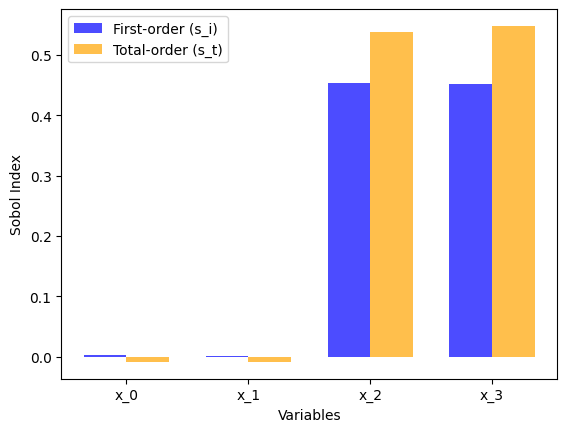

In [4]:
import matplotlib.pyplot as plt

# Extract values
variables = ['x_0', 'x_1', 'x_2', 'x_3']
s_i = [data_sobol.iloc[var]['s_i'] for var in range(len(variables))]
s_t = [data_sobol.iloc[var]['s_t'] for var in range(len(variables))]

# Plot bar chart for Sobol indixes
x = range(len(variables))
width = 0.35
plt.bar(x, s_i, width, label='First-order (s_i)', color='blue', alpha=0.7)
plt.bar([p + width for p in x], s_t, width, label='Total-order (s_t)', color='orange', alpha=0.7)
plt.xlabel("Variables")
plt.ylabel("Sobol Index")
plt.xticks([p + width / 2 for p in x], variables)
plt.legend()
plt.show()